## Question 2

#### 1)

In [39]:
import numpy as np
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
os.getcwd()
os.chdir(r'C:\Users\Primo\OneDrive\Desktop\2022Fall\Stats Analysis\A2')

In [4]:
u1357 = pd.read_csv('U1357.csv')

In [8]:
import random
def sample_wr (inData):
    n = len(inData)
    outData = np.empty((n,1))
    for i in range(n):
        j = int(random.random() * n)
        outData[i] = inData[j]
    return outData

In [16]:
u1357 = u1357.to_numpy()
print(type(u1357))

<class 'numpy.ndarray'>


In [33]:
a = []
b = []
random.seed(20221013)
for i in range(10000):
    sample = sample_wr(u1357)
    sample_a = np.mean(sample) - math.sqrt(3) * np.std(sample)
    sample_b = np.mean(sample) + math.sqrt(3) * np.std(sample)
    a.append(sample_a)
    b.append(sample_b)

In [34]:
est_a = np.asarray(a)
est_b = np.asarray(b)
mme_a = np.mean(est_a)
mme_b = np.mean(est_b)
print("The mme of a is: ", mme_a, "and the mme of b is: ", mme_b)

The mme of a is:  -2.2842488835227077 and the mme of b is:  3.6841455112603647


#### 2)

In [35]:
a_std = np.std(est_a)
b_std = np.std(est_b)
print("The standard deviation of a_hat is: ", a_std, "and the standard deviation of b is: ", b_std)

The standard deviation of a_hat is:  0.05898983395157765 and the standard deviation of b is:  0.05915200193513628


#### 3)

In [38]:
a_ci_low = mme_a - 1.96 * a_std
a_ci_high = mme_a + 1.96 * a_std
b_ci_low = mme_b - 1.96 * b_std
b_ci_high = mme_b + 1.96 * b_std
print("The 95% interval for a is: (", str(a_ci_low),",",str(a_ci_high),") and for b is: (", str(b_ci_low),",",str(b_ci_high), ")")

The 95% interval for a is: ( -2.3998689580678 , -2.1686288089776156 ) and for b is: ( 3.5682075874674974 , 3.800083435053232 )


#### 4)

In [46]:
est_a.min()

-2.5059856420940347

In [54]:
a_bin_min = math.floor(est_a.min())
a_bin_max = math.ceil(est_a.max())
a_bins = np.arange(a_bin_min, a_bin_max, 0.05)

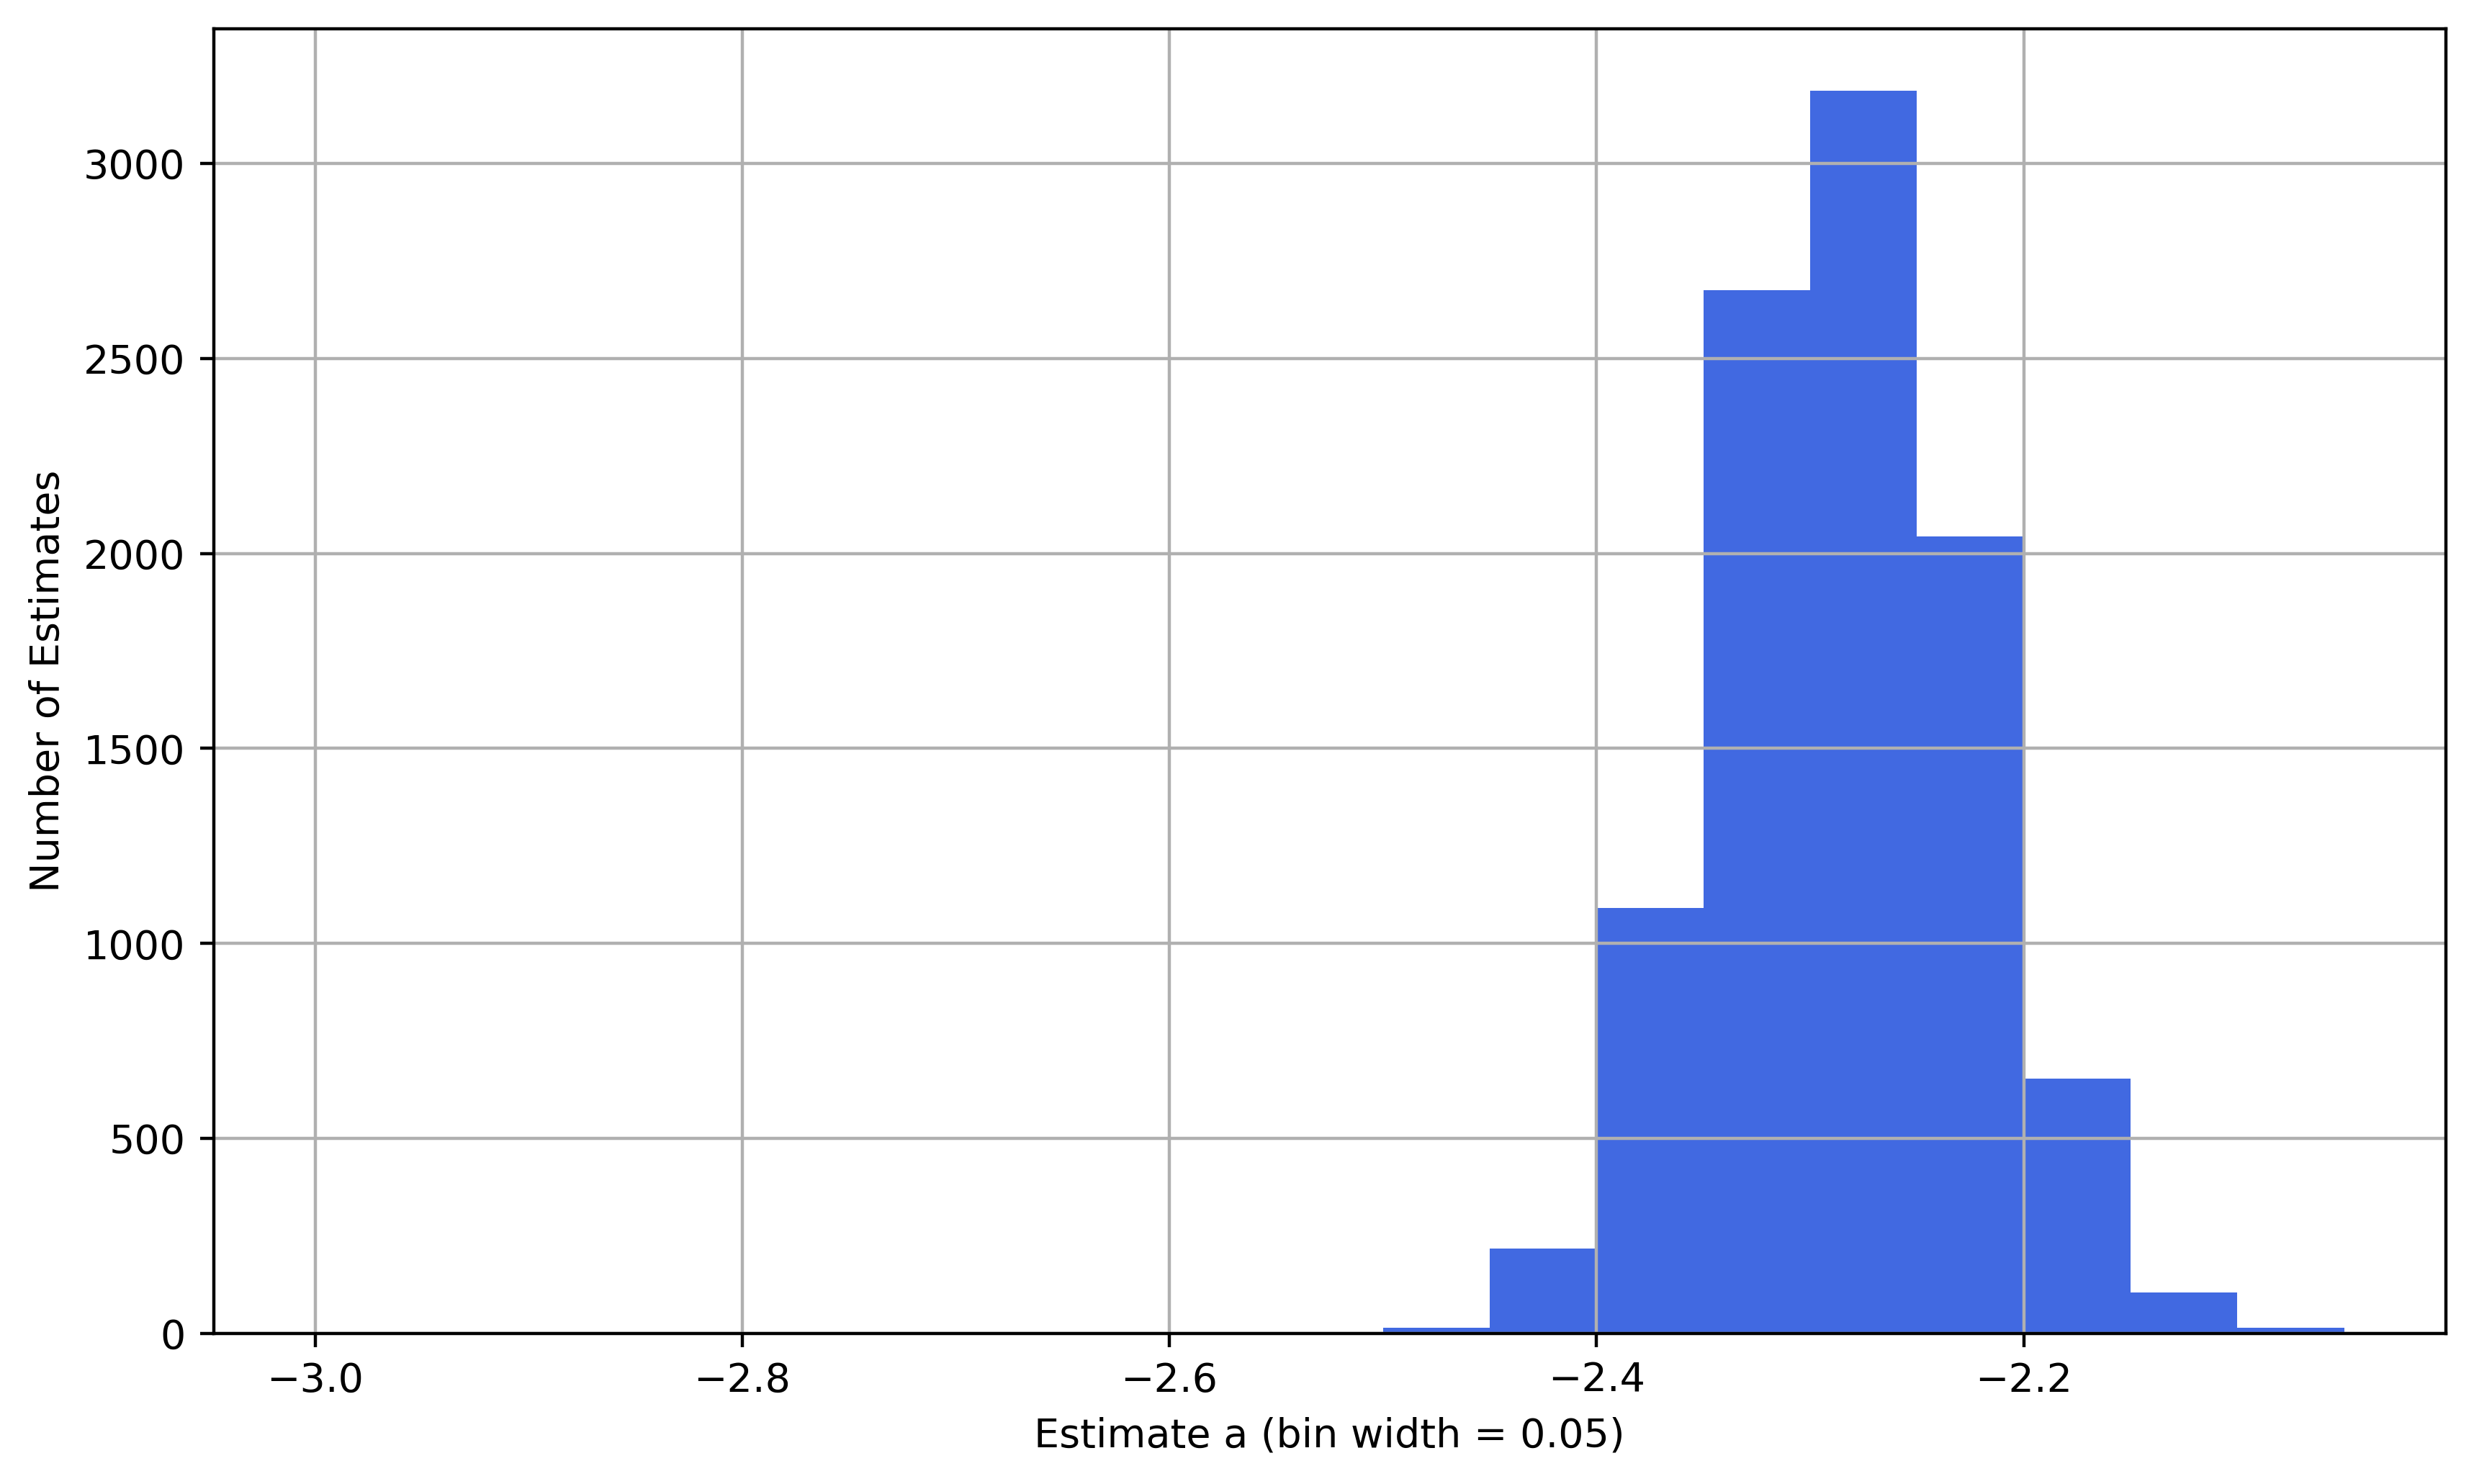

In [55]:
plt.figure(figsize = (10,6), dpi = 400)
plt.hist(est_a , bins = a_bins, color = 'royalblue')
plt.xlabel('Estimate a (bin width = 0.05)')
plt.ylabel('Number of Estimates')
plt.grid(axis = 'both')
plt.show()

In [58]:
b_bin_min = math.floor(est_b.min())
b_bin_max = math.ceil(est_b.max())
b_bins = np.arange(b_bin_min, b_bin_max, 0.05)

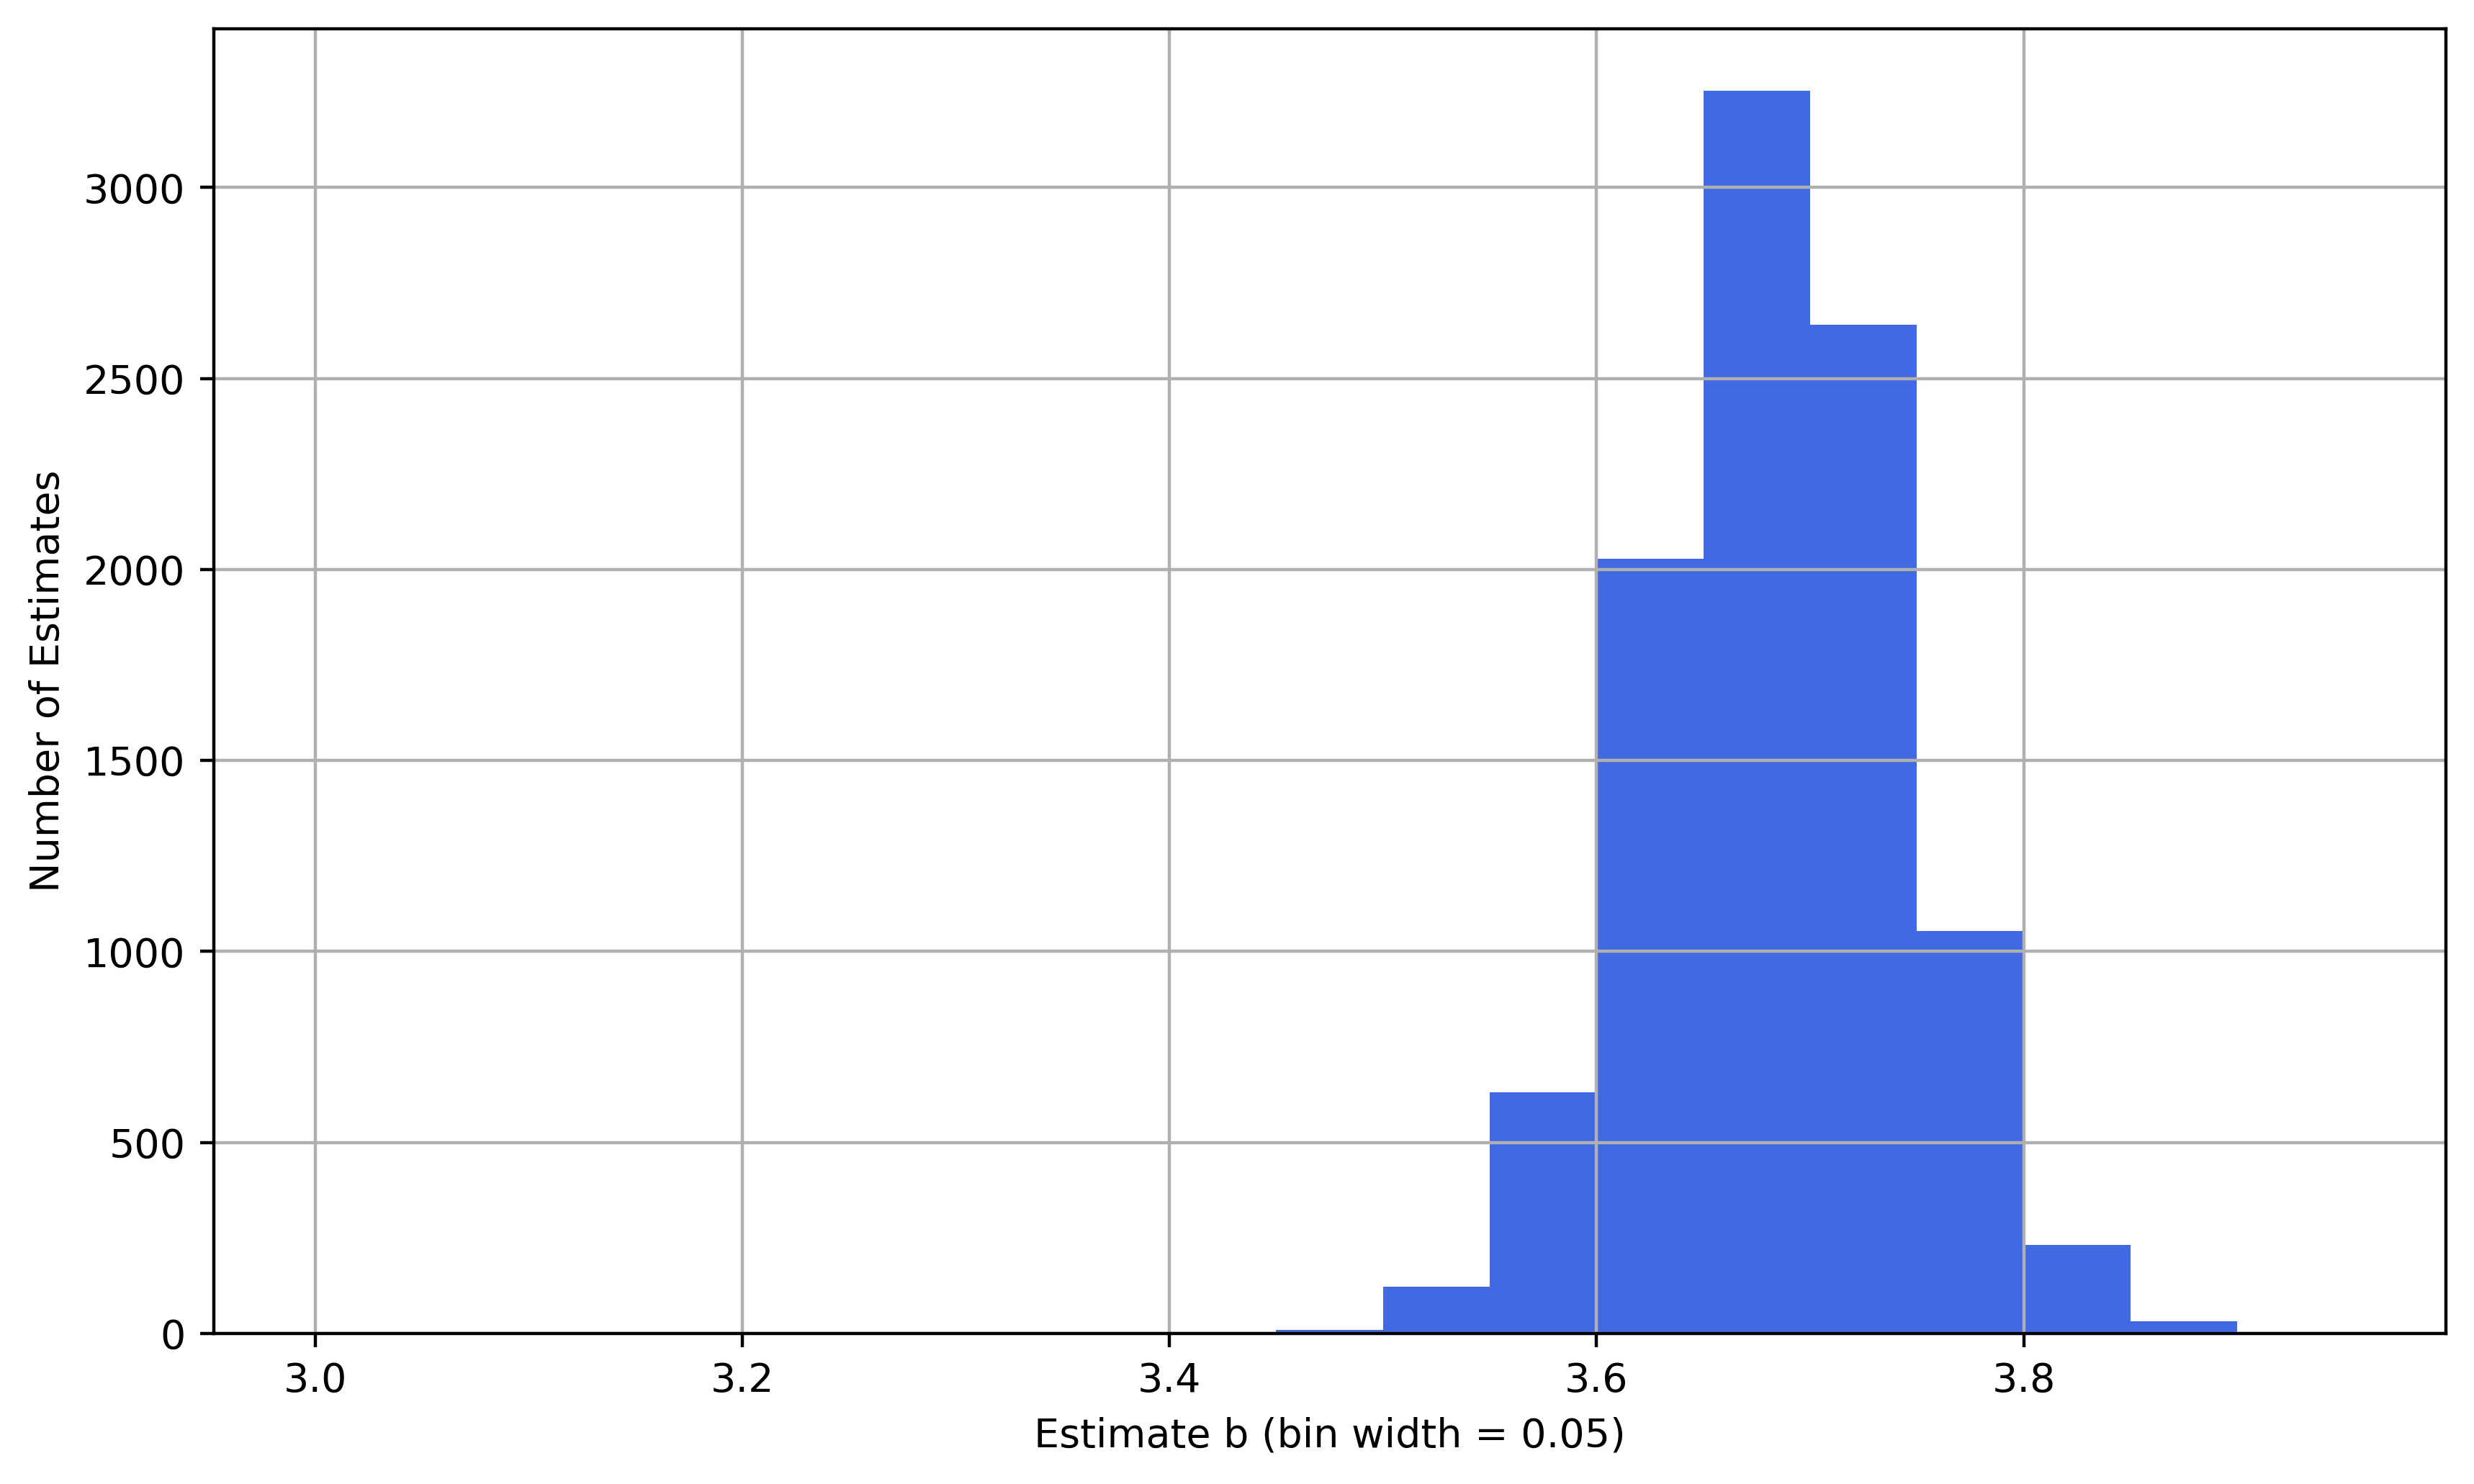

In [59]:
plt.figure(figsize = (10,6), dpi = 400)
plt.hist(est_b , bins = b_bins, color = 'royalblue')
plt.xlabel('Estimate b (bin width = 0.05)')
plt.ylabel('Number of Estimates')
plt.grid(axis = 'both')
plt.show()

## Question 3

#### 1)

In [61]:
b_pressure = pd.read_excel('BloodPressure.xlsx')

In [66]:
b_pressure.describe()

,Day,Systolic,Diastolic
count,2140.000000,2044.000000,2044.000000
mean,1070.500000,116.214775,74.436888
std,617.909109,8.734646,5.072111
min,1.000000,92.000000,55.000000
25%,535.750000,110.000000,71.000000
50%,1070.500000,116.000000,74.000000
75%,1605.250000,121.250000,78.000000
max,2140.000000,156.000000,94.000000


In [64]:
b_pressure["Systolic"].isnull()
b_pressure["Diastolic"].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
2135     True
2136     True
2137    False
2138    False
2139    False
Name: Diastolic, Length: 2140, dtype: bool

In [84]:
b_pressure.dropna(how='any', inplace=True)

Since we know neither the population mean nor the population variance, we can perform t-test in this example. 

In [87]:
d_systolic = b_pressure["Systolic"].values
n = len(d_systolic)

In [90]:
from scipy.stats import t
h0_mu = 120.0
n = len(d_systolic)
x_mean = np.mean(d_systolic)
x_std = np.std(d_systolic)
t_stat = np.sqrt(n) * (x_mean - h0_mu) / x_std
t_abs = abs(t_stat)
p_value = t.cdf(-t_abs, (n-1)) + t.sf(t_abs, (n-1))

In [92]:
print("The test statistic is: ", t_stat)

The test statistic is:  -19.59715921477689


In [97]:
t_critical = t.ppf(0.975, (n-1))
x_lower = h0_mu - t_critical * x_std / np.sqrt(n)
x_upper = h0_mu + t_critical * x_std / np.sqrt(n)
print("The x_mean is: ", x_mean)
print("The test rejection region is: (", str(x_lower), ",", str(x_upper), ")")

The x_mean is:  116.21477495107632
The test rejection region is: ( 119.62120516855424 , 120.37879483144576 )


In [100]:
print("The critical value is: ", t_critical, ", so the rejection region is etiher t > 1.96 or t < -1.96 for two-tail test with significance level 5%")

The critical value is:  1.961125831524342 , so the rejection region is etiher t > 1.96 or t < -1.96 for two-tail test with significance level 5%


In [94]:
print("The test significance value (aka p-value is: )", p_value)

The test significance value (aka p-value is: ) 1.6882775350454464e-78


In [101]:
print("We have enough evidence to reject the null hypothesis if we set significance level at 5%")

We have enough evidence to reject the null hypothesis if we set significance level at 5%


#### 2)

In [102]:
d_diastolic = b_pressure["Diastolic"].values
n = len(d_diastolic)

In [103]:
from scipy.stats import t
h0_mu = 80.0
n = len(d_diastolic)
x_mean = np.mean(d_diastolic)
x_std = np.std(d_diastolic)
t_stat = np.sqrt(n) * (x_mean - h0_mu) / x_std
t_abs = abs(t_stat)
p_value = t.cdf(-t_abs, (n-1)) + t.sf(t_abs, (n-1))

In [104]:
print("The test statistic is: ", t_stat)

The test statistic is:  -49.599317082088646


In [105]:
t_critical = t.ppf(0.975, (n-1))
x_lower = h0_mu - t_critical * x_std / np.sqrt(n)
x_upper = h0_mu + t_critical * x_std / np.sqrt(n)
print("The x_mean is: ", x_mean)
print("The test rejection region is: (", str(x_lower), ",", str(x_upper), ")")

The x_mean is:  74.43688845401174
The test rejection region is: ( 79.78003806507189 , 80.21996193492811 )


In [106]:
print("The critical value is: ", t_critical, ", so the rejection region is etiher t > 1.96 or t < -1.96 for two-tail test with significance level 5%")

The critical value is:  1.961125831524342 , so the rejection region is etiher t > 1.96 or t < -1.96 for two-tail test with significance level 5%


In [107]:
print("The test significance value (aka p-value is: )", p_value)

The test significance value (aka p-value is: ) 0.0


In [108]:
print("We have enough evidence to reject the null hypothesis if we set significance level at 5%")

We have enough evidence to reject the null hypothesis if we set significance level at 5%


#### 3)

In [140]:
from scipy.stats import norm
h0_mu = 120
h0_std = 8
n = len(d_systolic)
x_mean = np.mean(d_systolic)
z_critical = norm.ppf(0.975)
x_lower = h0_mu - z_critical * h0_std / np.sqrt(n)
x_upper = h0_mu + z_critical * h0_std / np.sqrt(n)

In [144]:
xbar_std = h0_std / np.sqrt(n)

mu_value = np.arange(80, 160, 10)
stat_power = []
for h1_mu in mu_value:
    prob = norm.cdf(x_lower, loc = h1_mu, scale = xbar_std) + norm.sf(x_upper, loc = h1_mu, scale = xbar_std)
    stat_power.append(prob)

In [145]:
plt.figure(figsize = (16,9), dpi = 1600)
plt.plot(mu_value, stat_power)
plt.axhline(y = 0.05, linestyle = '--', color = 'red')
plt.xlabel('Alternative Hypothesis Mean')
plt.ylabel('Statistical Power')
plt.xticks(range(80,160,10))
plt.yticks(np.arange(0.0,1.1,0.1))
plt.grid(axis = 'both')
plt.show()

In [146]:
df = pd.DataFrame(stat_power, index=mu_value, columns=['Statistical Power'])
df

,Statistical Power
80,1.00
90,1.00
100,1.00
110,1.00
120,0.05
130,1.00
140,1.00
150,1.00
